**Note: Run The Notebook in Google Colab**

<h1 align="center">Visual Recognition Assignment 2 (Part 1)</h1>
<h2 align="center">Create a Panorama from Images</h2>

<p align="center">
<i>
Name: Mohd. Rizwan Shaikh &emsp; &emsp;  Roll no. IMT2019513
</i>
</p>

In [1]:
!pip install opencv-contrib-python==4.4.0.44

### Import relevant packages and plot input images

In [2]:
#Import relevant libraries
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Detect and Extract Keypoints and Descriptors:

In [3]:
# Function to detect keypoints and extract local invariant descriptors from them
def detectAndDescribe(img):
  # Convert image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Create SIFT detector
  sift = cv2.SIFT_create() 

  # get keypoints and descriptors
  (keypoints, descriptors) = sift.detectAndCompute(gray, None)

  #Plot the keypoints on image
  pointsImg = cv2.drawKeypoints(gray, keypoints, img, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  plt.figure(figsize=(9,6))
  plt.imshow(pointsImg)
  plt.show()

  return (keypoints, descriptors, pointsImg)

### Match Features Between Two Images

In [4]:
#Function to match features between two images
def featureMatcher(kps1, kps2, descrpt1, descrpt2, img1, img2, ratio):
  #Create matcher
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
  matches = bf.knnMatch(descrpt1, descrpt2, 2)

  #Ratio test
  goodlist = []
  good = []
  for m,n in matches:
      if m.distance < ratio*n.distance:
        goodlist.append([m])
        good.append(m)

  #Draw matches on images
  matchImg = cv2.drawMatchesKnn(img1, kps1, img2, kps2, goodlist, None, flags=2)

  plt.figure(figsize=(20,10))
  plt.imshow(matchImg)
  plt.show()

  return good, matchImg

### Get Homography Matrix

In [5]:
#Function to find Homography Matrix from two images
def findHomography(kps1, kps2, good):

  if len(good)> 4:
    src_pts = np.float32([kps1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([kps2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    H, status = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
  else:
    print("Not enough matches are found")
    status = None

  return (H, status)

### Stitch Images together

In [6]:
def stitchAndShow(img1, img2, M): 
  output = cv2.warpPerspective(img2, M,(img1.shape[1] + img2.shape[1], img1.shape[0]))

  output[0:img1.shape[0], 0:img1.shape[1]] = img1
  
  plt.figure(figsize=(20,10))
  plt.imshow(output)
  plt.show()

  return output

### Utility Functions

In [7]:
#Function to resize the image
def resize(img, ratio):
  h, w = img.shape[:-1]
  return cv2.resize(img, (int(w//ratio), int(h//ratio)), interpolation = cv2.INTER_NEAREST)

### EXAMPLE 1

In [8]:
#Read images and convert from BGR scale to RGB scale for plotting using matplotlib
image1 = cv2.imread('p_11.jpg')
image2 = cv2.imread('p_12.jpg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

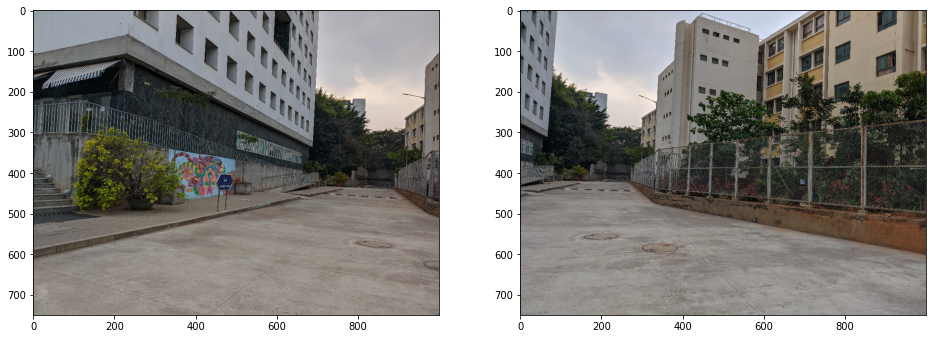

In [9]:
#Resize and plot images
image1 = resize(image1, 4)
image2 = resize(image2, 4)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.show()

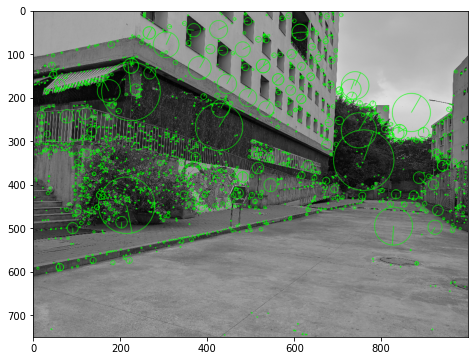

In [10]:
(keypoints1, features1, pointsImg1) = detectAndDescribe(image1.copy())

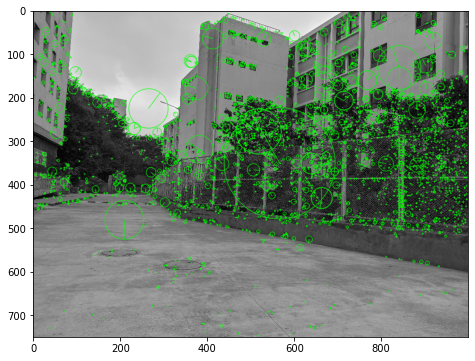

In [11]:
(keypoints2, features2, pointsImg2) = detectAndDescribe(image2.copy())

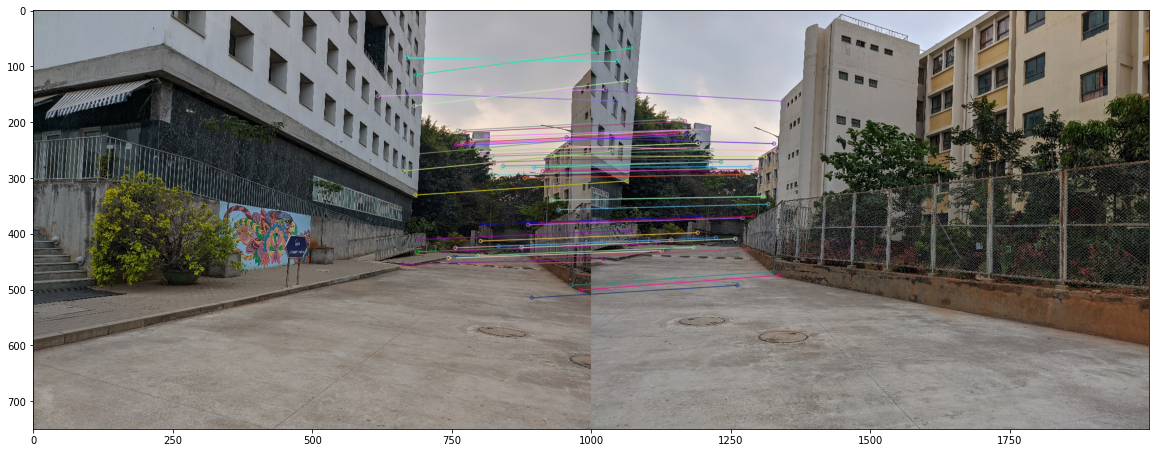

In [12]:
good, matchImg = featureMatcher(keypoints1, keypoints2, features1, features2, image1.copy(), image2.copy(), 0.6)

In [13]:
(H, status) = findHomography(keypoints1, keypoints2, good)

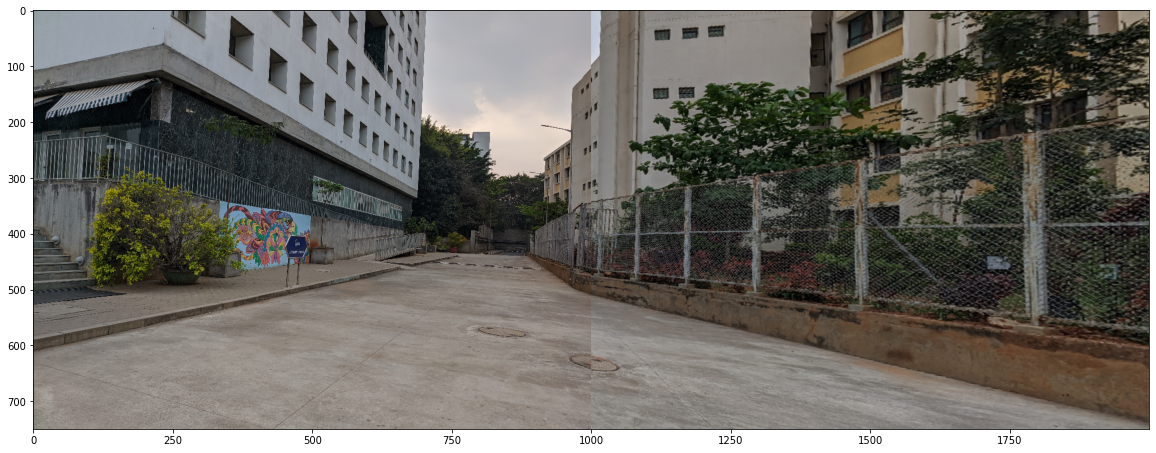

In [14]:
output1 = stitchAndShow(image1.copy(), image2.copy(), H)

In [15]:
pointsImg1 = cv2.cvtColor(pointsImg1, cv2.COLOR_BGR2RGB)
pointsImg2 = cv2.cvtColor(pointsImg2, cv2.COLOR_BGR2RGB)
matchImg = cv2.cvtColor(matchImg, cv2.COLOR_BGR2RGB)
output1 = cv2.cvtColor(output1, cv2.COLOR_BGR2RGB)

cv2.imwrite('ptsImg11.jpeg', pointsImg1)
cv2.imwrite('ptsImg12.jpeg', pointsImg2)
cv2.imwrite('match1.jpeg', matchImg)
cv2.imwrite('output1.jpeg', output1)

True

### EXAMPLE 2

In [16]:
#Read images and convert from BGR scale to RGB scale for plotting using matplotlib
image1 = cv2.imread('p_21.jpeg')
image2 = cv2.imread('p_22.jpeg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

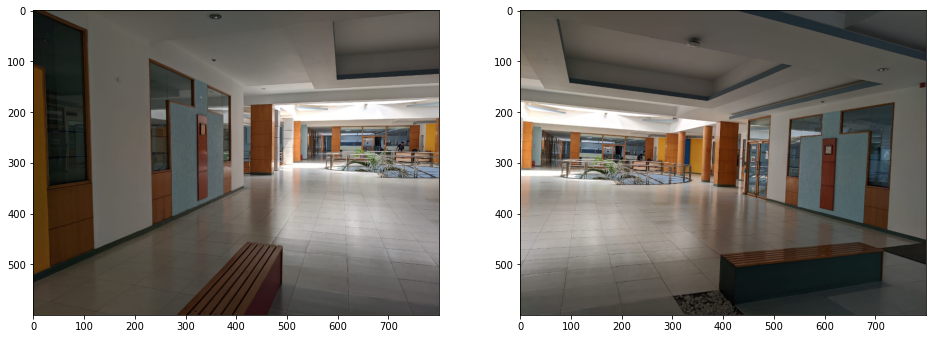

In [17]:
#Resize and plot images
image1 = resize(image1, 2)
image2 = resize(image2, 2)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.show()

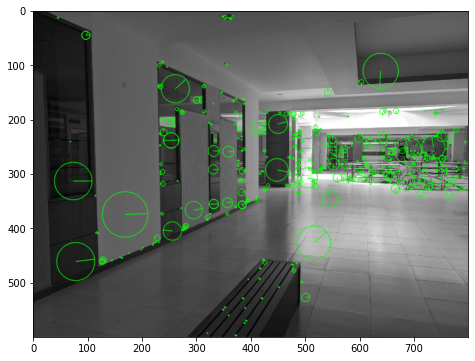

In [18]:
(keypoints1, features1, pointsImg1) = detectAndDescribe(image1.copy())

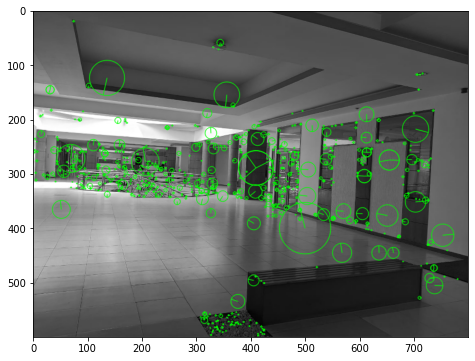

In [19]:
(keypoints2, features2, pointsImg2) = detectAndDescribe(image2.copy())

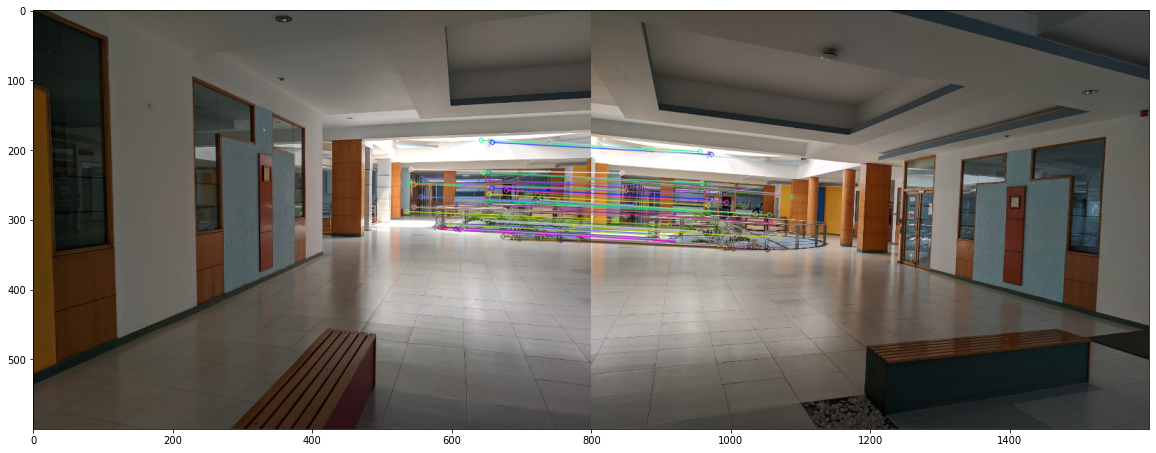

In [20]:
good, matchImg = featureMatcher(keypoints1, keypoints2, features1, features2, image1.copy(), image2.copy(), 0.5)

In [21]:
(H, status) = findHomography(keypoints1, keypoints2, good)

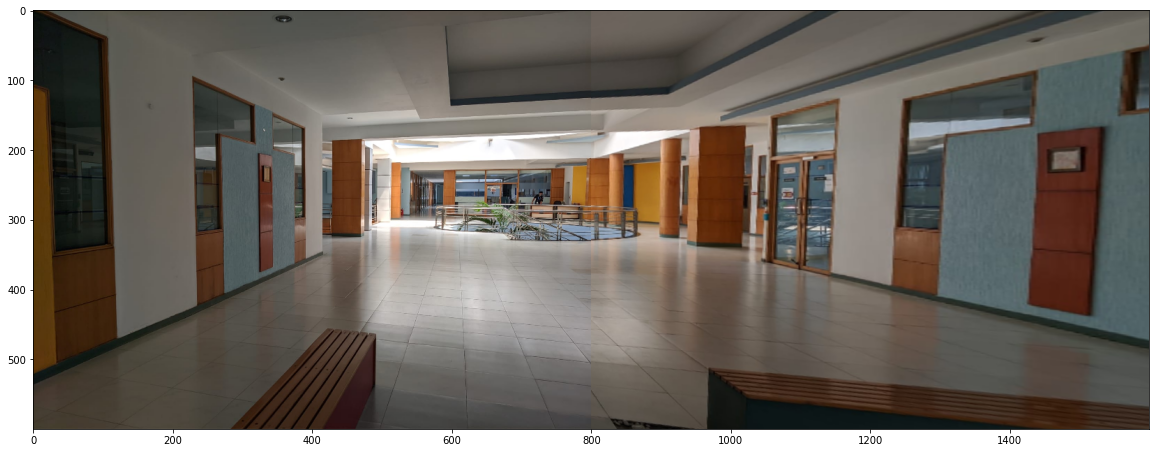

In [22]:
output1 = stitchAndShow(image1.copy(), image2.copy(), H)

In [23]:
pointsImg1 = cv2.cvtColor(pointsImg1, cv2.COLOR_BGR2RGB)
pointsImg2 = cv2.cvtColor(pointsImg2, cv2.COLOR_BGR2RGB)
matchImg = cv2.cvtColor(matchImg, cv2.COLOR_BGR2RGB)
output1 = cv2.cvtColor(output1, cv2.COLOR_BGR2RGB)

cv2.imwrite('ptsImg21.jpeg', pointsImg1)
cv2.imwrite('ptsImg22.jpeg', pointsImg2)
cv2.imwrite('match2.jpeg', matchImg)
cv2.imwrite('output2.jpeg', output1)

True

### EXAMPLE 3

In [24]:
#Read images and convert from BGR scale to RGB scale for plotting using matplotlib
image1 = cv2.imread('p_31.jpeg')
image2 = cv2.imread('p_32.jpeg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

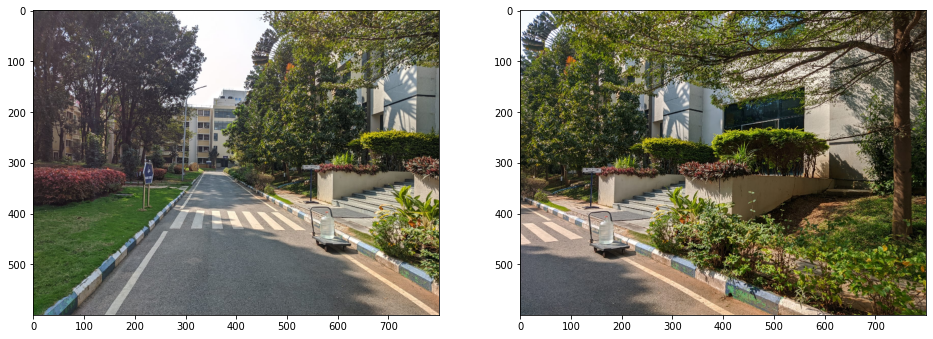

In [25]:
#Resize and plot images
image1 = resize(image1, 2)
image2 = resize(image2, 2)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.show()

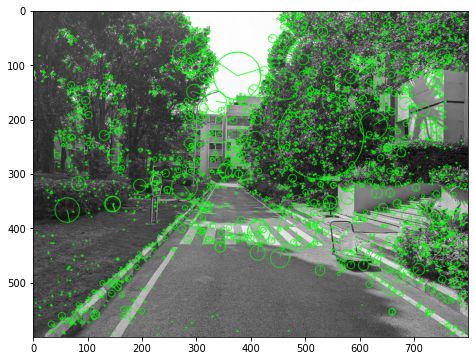

In [26]:
(keypoints1, features1, pointsImg1) = detectAndDescribe(image1.copy())

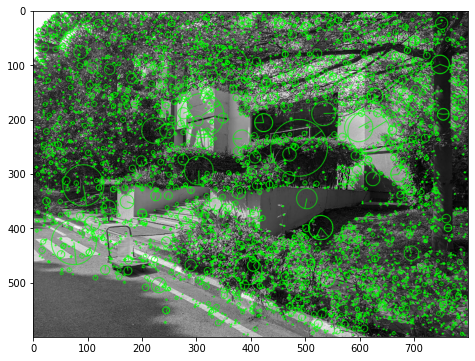

In [27]:
(keypoints2, features2, pointsImg2) = detectAndDescribe(image2.copy())

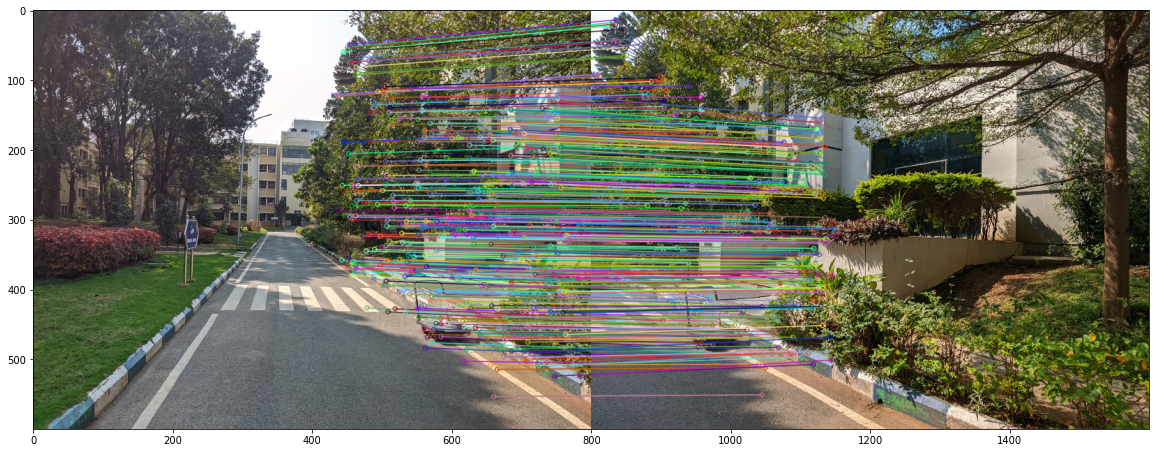

In [28]:
good, matchImg = featureMatcher(keypoints1, keypoints2, features1, features2, image1.copy(), image2.copy(), 0.6)

In [29]:
(H, status) = findHomography(keypoints1, keypoints2, good)

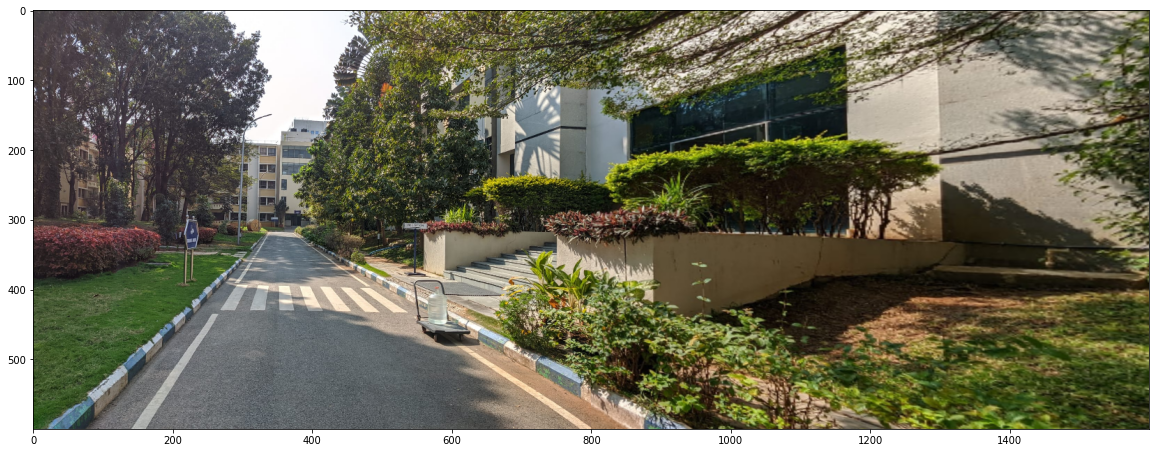

In [30]:
output1 = stitchAndShow(image1.copy(), image2.copy(), H)

In [31]:
pointsImg1 = cv2.cvtColor(pointsImg1, cv2.COLOR_BGR2RGB)
pointsImg2 = cv2.cvtColor(pointsImg2, cv2.COLOR_BGR2RGB)
matchImg = cv2.cvtColor(matchImg, cv2.COLOR_BGR2RGB)
output1 = cv2.cvtColor(output1, cv2.COLOR_BGR2RGB)

cv2.imwrite('ptsImg31.jpeg', pointsImg1)
cv2.imwrite('ptsImg32.jpeg', pointsImg2)
cv2.imwrite('match3.jpeg', matchImg)
cv2.imwrite('output3.jpeg', output1)

True